# Knapsack

Knapsack is a well-known combinatorial optimization problem; it is an NP-Hard problem in its general version and NP-Complete in its decisional version.<br>
It has been studied for more than a century and it is a very useful problem in many contexts, with various applications.


In the general case, we have $n$ items, each one with a specific value $v_i$ and weight $w_i$; we also have a maximum capacity $W$ for the knapsack; we want to find a set of items fitting into the knapsack that maximizes the total value of the items we pick.

The problem can be formulated in many ways and each variant has many approaches. 

Knapsack is a restricted version of a more general problem, **Partition**. In this problem we want to split a multiset of integers into two groups so that they have the same sum. Interestingly, the exact solution for the Partition Problem is very similar to the one we're going to see for the Knapsack Problem.

### Fractional Knapsack

A first interesting formulation is the **Fractional Knapsack**. In this case items can be partitioned, so for each one of them we can take just the portion we need to reach the maximum revenue.

A good **idea** to solve the problem under this conditions is using a **greedy approach**: 
+ compute the ratio
$
\begin{align*}
\frac{v_i}{w_i}
\end{align*}
$
for every item 
+ sort them according to this ratios in non-increasing order
+ take all items (interely) starting from the ones with higher ratio, up to the point where we reach an item $k$ for which<br><br>
$
\quad\quad\quad
\begin{align*}
\sum_{i=1}^{k-1}{w_i} \leq W
\end{align*}
$
and
$
\begin{align*}
\sum_{i=1}^{k}{w_i} > W
\end{align*}
$<br><br>
+ take just the first portion of the $k-th$ item, $\tilde{w}_k$, in such a way that<br><br>
$
\quad\quad\quad
\begin{align*}
\sum_{i=1}^{k-1} {w_i} + \tilde{w}_k = W
\end{align*}
$

Here is the code for this solution:

In [5]:
def frac_knapsack(v, w, W):
    n = len(v)
    r = [(float(vi)/float(wi), vi, wi) for (vi, wi) in zip(v, w)]
    r.sort(reverse=True)
    
    i, vr = 0, 0
    for (f, vi, wi) in r:
        if W - wi < 0:
            break
        else:
            vr += vi
            W -= wi
            i += 1
    
    if i < len(r):
        vr += float(W)/float(r[i][2])*r[i][1]
    
    return (vr, [vi for (_, vi, _) in r], [wi for (_, _, wi) in r])

In [6]:
v = [2, 7, 4, 10, 11, 1]
w = [14, 2, 6, 3, 8, 13]
n = len(v)
W = 14

vr, rv, rw = frac_knapsack(v, w, W)
dt.printData(rv, rw, W, val=vr, type="frac")

The solution for this formulation of the problem will be useful when discussing approximate solutions for the version of the problem we are going to consider next.

### 0/1-Knapsack

The formulation we are mostly interested in is the **0/1-Knapsack** problem. In this case we can only decide if we need to take an item or not, we cannot just take a part of it.

We first see a possible application of the problem and then a more general formulation.

#### Application Example

We want to implement a file download manager on a server which can transfer data on blocks of $W$ bytes.

**Input**: $n$ files, for each of them we know:
+ size: $w_1, w_2, ..., w_n$
+ value: $v_1, v_2, ..., v_n$
+ dimension of the block: $W$

**Goal**: find a subset of the $n$ files to transfer all together staying within $W$ bytes and maximizing the value of the files without splitting them.

#### General Formulation

In its general version, the 0/1-Knapsack (or simply Knapsack from now on) accepts $n$ items with their values and weights and tries to fit them inside the knapsack of capacity $W$ without splitting them.

**Input**:<br>
+ integer $W$, the max capacity
+ integer array $w[]$ of (positive) weights for the $n$ objects
+ integer array $v[]$ of values for the $n$ items

**Output**:
+ the total value of a subset $S \subseteq [1..n]$ which maximizes $\sum_{i \in S} v[i]$ under the constraint $\sum_{i \in S} w[i] \leq W$ as we want $S$ to fit into the knapsack (and possibly the set $S$ itself).

Our goal is to find total value for the best possible set $S^*$. We can also find $S^*$ itself with additional polynomial time.

In this general formulation Knapsack problem is NP-Hard. If we want to know if for the given input there is a subset $S$ for which $\sum_{i \in S} v[i] \geq \alpha$ then we have a NP-Complete problem, as in this case we have a decisional problem.

Knapsack problem is a good and illustrative example for studying NPC and NPH problems. It is a hard problem and we will figure this out by aplying the most naive approach, i.e. the **brute-force approach**. Then we will see two possible ways of finding an **exact and optimal solution** and, at last, a couple of ways to **approximate an optimal solution** in polynomial time.

## Brute-Force Approach

The first possible approach is the Brute-Force enumeration of all possible subsets $S$ to find the best one.<br>
The cost of this approach is $\tilde{O}(2^n)$, where $n$ is the number of objects in input.
>**Note**: with $\tilde{O}$ notation we ignore polynomial factors:
$$
\tilde{O}(f(n))=O(f(n) \cdot n^{O(1)})
$$

Following this approach is equal to generating all binary sequences $B$ of length $n$ such that $S = \{i \in [1..n]: B[i]=1\} $ and $\sum_{i \in S} w[i] \leq W$ and then taking the one that maximizes the total value for the chosen values.

The following code implements the approach we have described and prints datas and the resulting optimal set, together with the optimal value coming from it.

In [7]:
def bruteForce(v, w, W, S = set(), size = 0, sum = 0, i = 0):
    global best, bestS
    if(i >= n):
        if(sum > best):
            best = sum
            bestS = S
    else:
        bruteForce(v, w, W, S, size, sum, i+1)
        if(size + w[i] <= W):
            bruteForce(v, w, W, S.union({i+1}), size + w[i], sum + v[i], i+1)

In [8]:
v = [2, 7, 4, 10, 11, 1]
w = [14, 2, 6, 3, 8, 13]
n = len(v)
W = 14

best, bestS = 0, set()

bruteForce(v, w, W)
dt.printData(v, w, S=bestS, val=best, type="bf")

In the following tree we can see a graphical representation for the previous example. At each level we can choose two possible paths:
+ if we **take** the current element we go to the right
+ if we do **not take** the current element we go to the left.


Every full path from the root to one of the leaves represents a possible set we're going to consider.<br>
Exploring all possible paths we eventually find the best one that maximizes the sum of the values.<br>
In the following tree the optimal path is enlightened in orange.

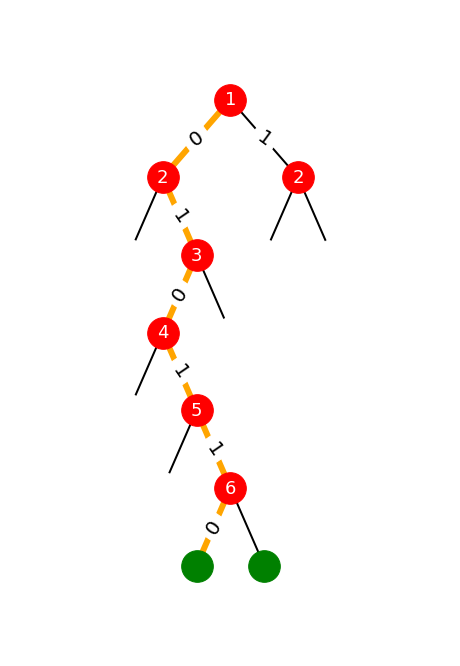

In [9]:
plot_bf()

> $S = \{2, 4, 5\}$

## Dynamic Programming

Another possible approach to solve the Knapsack problem is to use Dynamic Programming.

The basic idea is to solve the main problem combining the solutions of its possible subproblems.<br>
These subproblems can be defined considering:
+ all subsets composed of the first $k$ items, $\forall k, 0 \leq k \leq n$
+ all possible values for the capacity, from $0$ to $W$

Combining all the possibilities, we get a total of $(n+1) \, (W+1)$ subproblems, the last one of them being the original one we want to solve.<br>
To solve all these problems we can build a table where each cell stores the optimal value for the corresponding subproblem; we can then start filling the table starting from the easiest subproblems and then compute the solutions for more difficult ones from the solutions we've already computed.

Finding the optimal value for the cell $T[i][j]$ in the table means finding the solution for the subproblem considering just the first $i$ of the $n$ items while having a maximum capacity of $j$.

Since any subproblem can be solved from easier ones, we can fill the table row after row, from the top to the bottom, going from the left to the right inside each row.

When we reach the point of filling the cell $T[i][j]$ in the table, we have two alternatives and we have to choose the one that gives the maximum value:
+ we exclude the $i-th$ element from the optimal set, meaning that the solution for $T[i][j]$ is the same as the one for $T[i-1][j]$
+ we include the $i-th$ element into the optimal set, meaning that the solution for $T[i][j]$ is given by $T[i-1][j-w_i] + v_i$; in fact, if we want to take the $i-th$ element, we have to consider a previous solution in which it surely fits, thus decreasing the value of $j$ by $w_i$

Notice that, if $w_i > j$ this means that the weight of the $i-th$ element is greater than the capacity for the current subproblem, so we cannot include it inside the optimal set and we have no choice but to consider the option in with it is excluded.

The solution for the cell $T[i][j]$ is the maximum value among those we get from the above options.

For the base cases, we have that the first row and the first column are filled in with $0$s; in fact, if we have no item or if we have a maximum capacity of $0$, the best value we can get is always $0.$

The solution for the original problem can be found in $T[n][W]$.

In the following table we can see a visual representation of the solution for $T[i][j]$.

In [10]:
optimal_table(version="W")

In the following formula we can see exactly how each subproblem can be solved. 

> $
T[i][j] =
\begin{cases} 
0 & if \quad i=0 \;\;or\;\; j=0\\
T[i-1][j] & if \quad j<w_i\\
max\{\\ \quad T[i-1][j], \\ \quad T[i-1][j-w_i]+v_i\;\} & otherwise
\end{cases}
$

The following code computes the dynamic programming solution we've discussed so far. The input is the same we've used for the brute-force approach and we can see that the solution we get is the same.

In [11]:
def dp1(v, w, W):
    n = len(v)
    T = [[0 for j in range(W+1)] for i in range(n+1)]
    
    #filling the table
    for i in range(1, n+1):
        for j in range(1, W+1):
            if(w[i-1] > j): 
                T[i][j] = T[i-1][j]
            else:
                T[i][j] = max(T[i-1][j], T[i-1][j - w[i-1]] + v[i-1])
    
    #computing optimal set
    S, i, j = set(), n, W
    while(i>0 and j>0):
        if w[i-1] <= j:
            if T[i-1][j-w[i-1]] + v[i-1] > T[i-1][j] :
                S = S.union({i})
                j = j - w[i-1]
        i = i-1

    return (T, S, T[n][W])

In [12]:
v = [2, 7, 4, 10, 11, 1]
w = [14, 2, 6, 3, 8, 13]
n = len(v)
W = 14

T, bestS, best = dp1(v, w, W)
dt.printData(v, w, W=W, val=best, S=bestS, T=T, type="dp1")

The total cost of this algorithms is $O(n\,W)$, since it simply fills up a table with $n+1$ rows and $W+1$ columns, taking $O(1)$ to fill each cell.

The computational cost of this algorithm is considered **pseudo-plynomial** as it depends on the value of $W$ and not on the space it occupies (being it an input parameter); since this value can be very high, the table can become very big and the time to find the solution can explode.

#### How to find the optimal set 

Once we have the table completely filled, we can retrieve the optimal set in linear time.

Starting from the cell $T[n][W]$ where we can find the optimal value for the complete problem, we go back to the subproblems that contribute to generate this solution. For a general subproblem $T[i][j]$:
+ if $w_i > j$ we go back to subproblem $T[i-1][j]$ and we discard the $i-th$ element
+ otherwise, we check the maximum between:<br><br>
 + $T[i-1][j-w_i] + v_i$
 + $T[i-1][j]$<br>



> In this case we choose the best one, then, if we've chosen the former option we include the $i-th$ item in the optimal set and move to the subproblem $T[i-1][j- w_i]$; if we've chosen the latter, we exclude the current item and we move to the subproblem $T[i-1][j]$.
+ we repeat this procedure until we get to the first row.

Since we have a computaional cost of $O(1)$ for each row, we have a total cost of $O(n)$ to find the optimal set.

In the following table we can see a visual representation of how we can retrieve the optimal set from the complete table. The green circles represent the items we include in $S$, the red one is the optimal value, while the yellow circles are the steps we take to reach the first row.

In [13]:
dt.printSet(v, w, W=W, val=best, S=bestS, T=T, type="dp1", print_values=False)

### Dynamic Programming - Profit Knapsack

There is another way to solve the Knapsack problem using Dynamic Programming, called the **Profit Knapsack** approach: we can split the main problem in subproblems as before, but this time we consider:
+ all subsets composed of the first $k$ items, $\forall k.\: 0 \leq k \leq n$
+ all possible optimal values, from $0$ to $n \, v_{max}$, where $v_{max}$ is the maximum value among all items.

The approach is much similar to the one we've just seen: we build a table where each cell contains the optimal solution for the corresponding subproblem and we fill every cell computing its value starting from the solutions of subproblems we've already solved.

This time, though, each subproblem $T[i][j]$ requires us to find the subset of the first $i$ items with a total value of **at least** $j$ that minimizes the sum of their weights.

As before, when we have to fill the cell $T[i][j]$ in the table, we have two alternatives and we need choose the one that minimizes the weight:
+ we exclude the $i-th$ element from the optimal set, meaning that the solution for $T[i][j]$ is the same as the one for $T[i-1][j]$
+ we include the $i-th$ element into the optimal set, meaning that the solution for $T[i][j]$ is given by $T[i-1][j-v_i] + w_i$; in fact, to take the $i-th$ element, our best choice is to go back $v_i$ columns to make the total weight as low as possible, mantaining the total value at least equal to $j$.

Notice that, if for the current item $i$ we have that $v_i > j$, we can still choose to pick the $i-th$ item; in this case, though, we will minimize between the option of not picking it, paying $T[i-1][j]$, or picking only that item alone, paying only its weight $w_i$. In fact, in this second case, our best option is go back up to the first column to minimize the total weight still staying above a value of $j$, paying, thus, $0+w_i$, since $T[i-1][0]=0$.

Considering the base cases, we have that all the first column is filled in with $0s$ since to reach at least a value of 0 we can just exclude all items; all the first row, except for the first cell, is filled in with $+\infty$ since to reach at least a value of $j\geq1$ with no items we pay, ideally, an infinite weight.

> **Note**: an important property of this solution is that, in every row, all values are non decreasing from left to right. In fact, in the first column we will always have the value of $0$; in a certain row $i$, we have that the value for the cell will be equal to $v_i$ until $v_i = j$ or it will be consistent with the ones from the row above, depending on wich walue is the smallest; from that point on the value in the same row can only increase or stay the same as can be seen from the formula defining the solution for $T[i][j]$.

The optimal value for the problem can be found looking at the last row: here, for each column, we have the minimum weight that grants the total value to be at least $j$; since values always increase in each row, going from left to right in the last row we reach a cell which is the last one with a value **less or equal than $W$**; the total value corresponging to this cell is the best we can get, since to get a value of at least the one represented by the following column we need a total weight that exceeds the maximum capacity.

The following table is a visual representation of what has been discussed so far.

In [14]:
optimal_table(version="Vmax")

The following formula simply states formally how the solution for the subproblem $T[i][j]$ can be found.

>$
T[i][j] =
\begin{cases} 
    0 & if \quad j=0, \;\forall\: 0 \leq i \leq n\\
    +\infty & if \quad i=0, \;\forall\: 1 \leq j \leq n\,v_{max}\\
    min\{ T[i-1][j], w_i \} & if \quad j<v_i\\
    min\{\\ \quad T[i-1][j], \\ \quad T[i-1][j-v_i]+w_i\;\} & otherwise
\end{cases}
$

The following code solves the Knapsack problem using the profit approach. Notice that, instead of the infinity value in the first row we have used the sum of all the possible weights increased by one, a value that cannot be reached in the computation.

In [15]:
def dp2(v, w, W):
    n = len(v)
    vmax = max(v)
    wsum = sum(w) + 1
    
    T = [[wsum for j in range(n*vmax + 1)] for i in range(n+1)]
    
    #filling the table
    for i in range(n+1):
        T[i][0] = 0
    for i in range(1, n+1):
        for j in range(1, n*vmax + 1):
            if(v[i-1] > j): 
                T[i][j] = min(T[i-1][j], w[i-1])
            else:
                T[i][j] = min(T[i-1][j], T[i-1][j - v[i-1]] + w[i-1])

    #computing optimal solution
    res = -1
    while(res < n*vmax and T[n][res+1] <= W):
        res = res + 1
    
    #computing optimal set
    S, i, j = set(), n, res
    while(i>0 and j>0):
        if(v[i-1] > j): 
            if w[i-1] < T[i-1][j] :
                S = S.union({i})
                break
        else:
            if T[i-1][j-v[i-1]] + w[i-1] < T[i-1][j] :
                S = S.union({i})
                j = j - v[i-1]
        i = i-1

    return (T, S, res)

In [16]:
v = [2, 7, 4, 10, 11, 1]
w = [14, 2, 6, 3, 8, 13]
n = len(v)
W = 14

T, bestS, best = dp2(v, w, W)
dt.printData(v, w, W=W, val=best, S=bestS, T=T, type="dp2")

The total cost in time for this solution is $O(n^2\,v_{max})$, since we have to fill a table with $n+1$ rows and $n\,v_{max}+1$ columns.

As before, we have a pseudo-polynomial solution, since it depends on the value of $v_{max}$ and not on the space we need to represent it (being it a input value). The cost for this solution can grow as fast as the previous one.

#### How to find the optimal set 

As before, we can compute the optimal set once we have the table completely filled.<br>
Assuming that $V$ is the optimal value we have found during the computation, we start from $T[n][V]$ ang we go back to previous subproblems as we did before. For a general subroblem $T[i][j]$:
+ if $v_i > j$ we check the minimum between:<br><br>
    + $T[i-1][j]$
    + $w_i$

> We choose the best option and in the first case we exclude the $i-th$ element from the optimal set, while in the second one we include it.<br>
If we choose the former option, we move to the subproblem $T[i-1][j]$. If we choose the latter we simply stop searching, since we cannot have more items in the optimal set; in fact, in this case we should ideally move to subproblem $T[i-1][0]$ and from there we can only go up until we reach the first row, excluding all subsequent items.

+ if $v_i \leq j$ we check the minimum between:<br><br>
 + $T[i-1][j]$
 + $T[i-1][j-v_i] + w_i$

> In this case, we simply take the best option and if we choose the former option we exclude the element and move to the subproblem $T[i-1][j]$, while in the latter we include the element in the optimal set and move to subproblem $T[i-1][j-v_i]$.

+ we repeat this procedure until we get to the first row or the first column.

As before, since we have a computaional cost of $O(1)$ for each row, we have a total cost of $O(n)$ to find the optimal set.

In the following table we can see a visual representation of how we can retrieve the optimal set from the complete table. As before, the green circles represent the items we include in $S$, the red one is the optimal value, while the yellow circles are the steps we take to reach the first row.

In [17]:
dt.printSet(v, w, W=W, val=best, S=bestS, T=T, type="dp2", print_values=False)

### Summing up

We've seen three possible ways to solve the Knapsack problem, summarized below. As we've seen the best we can get if we want an exact solution is an algorithm which runs in pseudo-polynomial time.<br>
We will see now how to get a real polynomial time algorithm at the cost of an approximate solution.

| **Solution** | **Cost in Time** |
|:------------:|:--------:|
|Brute Force| $\tilde{O}(2^n)$ |
|DP1| $O(n\,W)$ |
|DP2| $O(n^2\,V_{max})$ |

> **Note**: since we now know two possible solutions involving dynamic programming we can choose, from time to time, the one with the smaller value between $W$ and $n\,v_{max}$. If one of them is significantly smaller than the other, we can get very good performace, but if this does not happen we can always go trhough a very bad scenario. As we can see in the following example, even using relatively small numbers for weights and values, we can get big tables in bot cases.

In [18]:
v = [28, 79, 94, 18, 121, 15, 21, 79, 42, 19, 21, 61, 92, 37, 44, 12, 51, 57]
w = [124, 252, 216, 198, 238, 137, 142, 209, 146, 123, 189, 163, 104, 272, 176, 253, 188, 134]
n = len(v)
W = 754

In [19]:
T, bestS, best = dp1(v, w, W)
dt.printData(v, w, W=W, val=best, S=bestS, T=T, type="dp1", print_table=True)

In [20]:
dt.printData(v, w, W=W, val=best, S=bestS, T=T, type="dp1", print_table=False)

In [21]:
T, bestS, best = dp2(v, w, W)
dt.printData(v, w, W=W, val=best, S=bestS, T=T, type="dp2", print_table=True)

In [22]:
dt.printData(v, w, W=W, val=best, S=bestS, T=T, type="dp2", print_table=False)

## Approximation Algorithms

We will now see how we can find a reasonable approximate solution for the Knapsack problem paying a polynomial time.<br>
We will firstly define what an **r-approximation** is for an NP-Hard problem and then we're going to find a **2-aproximation** for the Knapsack Problem.<br>
At last, we will see a **FPTAS** algorithm for our problem.

### r-approximation

A really useful tool we can use when we need to approximate the optimal solution for an NP-Hard problem $\Pi$, we generally can have two cases:
+ we're dealing with a **minimization problem**, so we need to **minimize** its **cost**
+ we're dealing with a **maximization problem**, so we need to **maximize** its **benefit**


We assume an optimal solution $S^*$ for $\Pi$ exists and it has a cost $cost(S^*)= \text{OPT}$.

**Def. : r-approximation**
>An **r-approximation**, with $r\:>\:1$, gives a solution $S$, respectively for a minimization and a maximization problem, such that:<br><br>
$
\begin{align*}
\quad\quad\quad minimization: \frac{cost(S)}{OPT} \;\leq\; r
\quad\quad\quad maximization: \frac{OPT}{cost(S)} \;\leq\; r
\end{align*}
$<br><br>
Sometimes the maximization case is equivalently called 
$
\begin{align*}
\frac{1}{r}-\text{approximation}
\end{align*}
$
as we can write:<br><br>
$
\begin{align*}
\quad\quad\quad maximization: cost(S) \;\geq\; \frac{1}{r}\:OPT
\end{align*}
$<br><br>

When we use an r-approximation, our aim is to reach a value of $r$ as low as possible. In many cases, this kind of algorithms can be really useful if they can give us a good approximation (i.e. if $r$ is sufficiently low) in polynomial time.

Notice that, even though in the maximization case we want to maximize the benefit, we call it $cost(S)$ anyway.

### 2-approximation

Now we'll see how to apply this idea to the **Knapsack** problem and how we can reach an approximation factor of **$2$**. Similarly as before, the problem is stated as follows:


**Input**:
+ $n$ items
+ array of values $v[]$, where $\forall i \in [1..n] .\; v_i \,>\, 0$
+ array of weights $w[]$, where $\forall i \in [1..n] .\; w_i \,>\, 0$
+ capacity $W > 0$

**Output**:
a subset $S \subseteq [1..n]$ such that:
+ the total weight of items in $S$ stays below the capacity: $\sum_{i \in S} w_i \leq W$
+ the total value of items in $S$, $\;\sum_{i \in S} v_i\;$,  is maximized

#### First Idea

As a first idea to reach a **2-approximation**, we can use a greedy approach, much similar to the one we've seen at the beginning for the **Fractional Knapsack**: we give priority to items with higer 
$
\begin{align*}
\;\frac{v_i}{w_i}\;
\end{align*}
$ratio, i.e. to the most valuable items.

We can suppose, w.l.o.g., that items are numbered as follows:<br><br>
$
\begin{align*}
\quad\quad\quad \frac{v_1}{w_1} \geq \frac{v_2}{w_2} \geq \;...\; \geq \frac{v_n}{w_n}
\end{align*}
$<br><br>
if it's not the case, we can always re-number them in such a way that the above property holds.

Now we can define a simple **greedy** algorithm, where we pick all the items starting from the beginning of the list, until we have room inside the knapsack.

The following code shows how to implement this simple solution and runs over the same example we used before, just with the items sorted in non increasing order by their ratio ($f$ in the output of the code).

In [23]:
def greedy(v, w, W):
    n = len(v)
    S = set()
    for i in range(n):
        if(w[i] <= W):
            S = S.union({i+1})
            W = W - w[i]
    costS = 0
    for i in S:
        costS = costS + v[i-1]
    return (S, costS)

In [24]:
v = [7, 10, 11, 4, 2, 1]
w = [2, 3, 8, 6, 14, 13]
n = len(v)
W = 14

S, costS = greedy(v, w, W)
dt.printData(v, w, S=S, val=costS, type="greedy")

We see that with a **greedy** approach like this we can get a pretty accurate result; actually in this case the result is exact and returns the same value we got from previous solution, although the optimal set reports different indeces since the items were sorted.

This approach appears to be good, but it can actually fail in some cases.<br>
If we have a series of high ratio items that contribute poorly to the total value and then a lower ratio item that contributes itself much more to the sum, if we do not have the possibility to include this last element inside the solution set, we get a much poorly accurate result.
Let's see a simple example.

Suppose we have $n-1$ items with the same value of $w$ and $v$ equal to $1$ and a last $n-th$ value $v_n = W-1$ and a weight $w_n = W$. Also suppose that $W = k\,n$, for some large $k > 1$. The following formulas formalize what we've just said:

$
\begin{align*}
\forall i \in [1..n-1],\;\;
\frac{v_i}{w_i} = 1 \quad
\begin{cases}
v_1 = v_2 = ... = v_{n-1} = 1\\
w_1 = w_2 = ... = w_{n-1} = 1
\end{cases}
\end{align*}
$

$
\begin{align*}
\qquad\qquad\qquad\;
\frac{v_n}{w_n} \:<\: 1 \quad
\begin{cases}
v_n = W-1\\
w_n = W
\end{cases}
\end{align*}
\quad\quad$, 
where $W=kn$ for any large $k>1$

In this case we have that all the first $n-1$ items have a ratio of $1$, while the last one have a ratio smaller than $1$. Since $n < W$, the first $n-1$ items are all picked, but doing so we must discard the last item, since it's weight is equal to the capacity of the kapsack itself, even though its value alone is grater the the sum of all other values:<br><br>
$
\quad\qquad n \:<\: W \;\Rightarrow\; n-1 \:<\: W-1
$.

In the following run of the **greedy** algorithm we can see how it fails on an example like this one. In particular, here we've chosen a value of $k=5$ and a value of $n=10$.

In [25]:
k = 5
n = 10
v = [1 for _ in range(n-1)] + [(n*k)-1]
w = [1 for _ in range(n-1)] + [n*k]
W = n*k 

S, costS = greedy(v, w, W)
dt.printData(v, w, val=costS, S=S, type="greedy")

Formalizing what we've said and what we've seen in the example, the result from the **greedy** approach is:<br><br>
$
\quad\quad\quad
\begin{align*}
cost(S) \:=\: m_G \:=\: \sum_{i \in S} v_i \:=\: n-1 
\end{align*}
$<br>
while we have that:<br><br>
$
\quad\quad\quad
OPT \:=\: W-1
$

Thus, we get:<br><br>
$
\begin{align*}
\quad\quad\quad
\frac{OPT}{cost(S)} \:=\:
\frac{W-1}{n-1} \:=\:
\frac{kn-1}{n-1} \:\sim\:
k
\end{align*}
$

If we have a large value of $k$, or at least a $k\:>\:2$ like in the running example, we cannot guarantee a **2-approximation**.

#### 2-approximation

To fix the issue, we can add a check at the bottom of the greedy algorithm: if the result coming from this approach, that we will call $m_G$, is smaller than the maximum possible value among all the items, called $v_{max}$, we will return the latter instead of the former. This results in a last step in the algorithm:<br><br>
$
\begin{align*}
\qquad\quad
return\;\; max \{m_G, v_{max}\}
\end{align*}
$,$\qquad$ 
where
$
\;\;
\begin{align*}
v_{max} = \max_{1 \leq i \leq n} v_i
\end{align*}
$<br><br>

> **Note**:  for this solution to be effective we need to make an assumption: for any input item we need to have that $w_i \leq W$, otherwise we have no guarantee that the element corresponding to the $v_{max}$ value fits inside the knapsack. This assumption is not penalizing at all: if we have an item for which $w_i > W$, this item will never fit inside the knapsack and will never be considered in any solution, so we can discard it *a priori*.

The following code implements the **2-approximation** solution, adding the last step that makes the algorithm sufficiently accurate.

In [26]:
def approx_2(v, w, W):
    n = len(v)
    lW = W
    S = set()
    for i in range(n):
        if(w[i] <= lW):
            S = S.union({i+1})
            lW = lW - w[i]
    
    mG = 0
    for i in S:
        mG = mG + v[i-1]
    
    vmax, imax = 0, 0
    for i, e in enumerate(v):
        if(e > vmax):
            vmax, imax = e, i
    
    costS = max(mG, vmax) if w[imax] <= W else mG
    if costS > mG and w[imax] <= W:
        S = {imax+1}
    
    return (S, costS)

In the following run we have the same input as before and we can see how now the solution is the one we expected.

In [27]:
k = 5
n = 10
v = [1 for _ in range(n-1)] + [(n*k)-1]
w = [1 for _ in range(n-1)] + [n*k]
W = n*k #here we choose k = 5

S, costS = approx_2(v, w, W)
dt.printData(v, w, val=costS, S=S, type="greedy")

For a double check we can run the first Dynamic Programming algorithm to check that the solution we get from the 2-approximation algorithm is correct:

In [28]:
T, S, costS = dp1(v, w, W)
dt.printData(v, w, W=W, val=costS, S=S, T=T, print_table=False, type="dp1")

Let's now see how how the last variation we introduced can guarantee us an actual **2-approximation**.<br>

The problem we are considering is a **maximization problem**, thus all we need to prove is that 
$
\begin{align*}
\frac{OPT}{cost(S)} \:\leq\: 2
\end{align*}
$.

**Observation**: we can find ourselves in **2 cases**:
1. if all items fit into $W$, we reach $OPT$ by picking the whole set
2. otherwise, some items have to be discarded

The non-trivial case is the second one and it is the one we're interested in. The claim we want to prove is the following.

**Claim**:<br><br>
$
\begin{align*}
\quad\quad\quad
\frac{OPT}{cost(S)} \;=\; \frac{OPT}{\max\{m_G, v_{max}\}} \;\leq\; 2
\end{align*}
$

To prove it, though, we first need to show an implicit argument.

<hr>

#### Upper Bound and Lower Bound argument

Since we do not know $OPT$, what we can do to prove an algorithm gives an **r-approximation** is to use a known upperbound $UB \geq OPT$ for the maximization case or a known lowerbound $LB \leq OPT$ for the minimization one:<br><br>
$
\begin{align*}
\quad\quad\quad maximization \quad\quad
\frac{OPT}{cost(S)} \;\leq\; \frac{UB}{cost(S)} \;\leq\; r\\
\end{align*}
$<br><br>
$
\begin{align*}
\quad\quad\quad minimization \quad\quad
\frac{cost(S)}{OPT} \;\leq\; \frac{cost(S)}{LB} \;\leq\; r
\end{align*}
$

If we can prove that $UB \:\geq\: OPT$ (or $LB \:\leq\: OPT$) and that 
$
\begin{align*}
\frac{UB}{cost(S)} \:\leq\: r\\
\end{align*}
$
$
\Bigl(
$ or 
$
\begin{align*}
\frac{cost(S)}{LB} \:\leq\: r
\end{align*}
\Bigr)
$ we have the proof that 
$
\begin{align*}
\frac{OPT}{cost(S)} \:\leq\: r
\end{align*}
$
$
\Bigl(
$ or 
$
\begin{align*}
\frac{cost(S)}{OPT} \:\leq\: r
\end{align*}
\Bigr)
$.

<hr>

Now we are ready to prove our claim.

**Proof**: Let's assume that all items are numbered in such a way that 
$
\begin{align*}
\;
\frac{v_1}{w_1} \:\geq\: \frac{v_2}{w_2} \:\geq \;...\; \geq\: \frac{v_n}{w_n}
\;
\end{align*}
$
and assume also that $j$ is the first item that does not fit. We have that $\overline{w_j}$ is the weight of the lasrgest prefix of consecutive items that fit and $\overline{v_j}$ is the sum of their values:<br><br>
$
\quad\quad\quad
\begin{align*}
\overline{w_j} \;=\; \sum_{i=1}^{j-1} w_i \;\leq\; W, \;\quad but \quad \sum_{i=1}^{j} w_j \;>\; W
\end{align*}
$
<br><br>
$
\quad\quad\quad
\begin{align*}
\overline{v_j} \;=\; \sum_{i=1}^{j-1} v_i
\end{align*}
$


Now, if we can find an **upper bound** $UB \:>\: OPT$ all we need to prove is that
$
\;
\begin{align*}
\frac{UB}{cost(S)} \;\leq\; 2
\end{align*}
$.

>**Observation**: Suppose that item j can be split into $j^{\prime}$ and $j''$ such that $v_j = v_{j'} + v_{j''}$ and $w_j = w_{j'} + w_{j''}$, with $w_{j'}$ fitting perfectly the difference between $\overline{w_j}$ and $W$. What we get is:<br><br>
$
\begin{align*}
\qquad\quad
\sum_{i=1}^{j-1} w_i + w_{j'} = W
\qquad
and
\qquad
\sum_{i=1}^{j-1} v_i + v_{j'} = {OPT}^*
\end{align*}
$
<br><br>
Notice that, with the second equality, we reach perfectly the optimal value ${OPT}^*$ that we would reach in the solution for the **Fractional Knapsack** we've seen at the beginning. Even though this exact solution is viable only for this version of the problem, it is surely greater or equal than the optimal solution we would get in the **0/1-Knapsack**:<br><br>
$
\qquad\quad
{OPT}^* \:\geq\: OPT
$<br><br>
and this suffices for our purpose.

We can exploit the above observation to state that $\;\overline{v_j} + v_j > OPT\;$. Thus we can pose:<br><br>
$
\qquad\quad
UB \;=\; \overline{v_j} + v_j \;>\; OPT
$ 

Now that we have our $UB$ all we need to prove is that:<br><br>
$
\begin{align*}
\quad\quad\quad
\frac{\overline{v_j} + v_j}{cost(S)} \;\leq\; 2
\qquad
\Leftrightarrow
\qquad
\overline{v_j} + v_j \;\leq\; 2\:cost(S)
\qquad
\Leftrightarrow
\qquad
\overline{v_j} + v_j \;\leq\; 2\:max\{\:m_G, v_{max}\:\}
\end{align*}
$

We have **two** possible **cases**:
+  $\quad \overline{v_j} \:>\: v_j \;\Longrightarrow\; \overline{v_j} + v_j \;<\; 2\:\overline{v_j} \;\leq\; 2\:m_G \;\leq\; 2\:max\{m_G, v_{max} \}$
+  $\quad \overline{v_j} \:\leq\: v_j \;\Longrightarrow\; \overline{v_j} + v_j \;\leq\; 2\:{v_j} \;\leq\; 2\:v_{max} \;\leq\; 2\:max\{m_g, v_{max} \} $<br><br>
<div style="text-align: right">$qed$</div>

We can also equivalently write:<br><br>
$
\quad\quad\quad
\begin{align*}
\frac{1}{2}\;OPT \;\leq\; cost(S)
\end{align*}
$

### FPTAS

Now we're going to see how we can increase the accuracy of our approximation. The main **idea** is to apply the **FPTAS** approach to the Knapsack Problem. Using an $\epsilon$ value, with $0 \;<\; \epsilon \;<\; 1$, we can get the following approximation:<br><br>
$
\qquad\quad
\begin{align*}
OPT\,(1 - \epsilon) \;\leq\; cost(S)
\end{align*}
$

and we aim to reach a polynomial cost in time proportional to $\begin{align*}\frac{1}{\epsilon}\end{align*}$.

Before proceding with the general case, let's see ho we can use the FPTAS approximation in a more bounded case.

<hr>

#### Bounded Weights Knapsack

Before proceding with the general case, let's see how the FPTAS approximation can be simply proved in the case of bounded weights.

**Claim**: Suppose that $w_i \leq \epsilon\,W$. Using the **greedy** approach we've seen before, under the same assumptions, we want to prove that:<br><br>
$
\qquad\quad
\begin{align*}
OPT\,(1 - \epsilon) \leq cost(S)
\end{align*}
$

**Proof**: When we reach item $j$ the knapsack is at least $(1 - \epsilon)$ full, meaning that $W - \overline{w_j} \;\leq\; \epsilon\:W$ holds; if this was not the case another item would have room to fit into the knapsack. So we have:<br><br>
$
\qquad\quad
W - \overline{w_j} \;\leq\; \epsilon\:W \quad \Leftrightarrow \quad \overline{w_j} \;\geq\; W - \epsilon\:W \;=\; (1-\epsilon)\:W
$

So, since we know that 
$
\overline{w_j} + w_{j'} = W
$, we have:<br><br>
$
\qquad\quad
w_{j'} = W - \overline{w_j} \;\leq\; \epsilon\:W \quad \Longrightarrow \quad w_{j'} \;\leq\; \epsilon\:W \quad (i)
$

What we want to prove now is that<br><br>
$
\qquad\quad
\overline{v_j} \;\geq\; (1-\epsilon)\:{OPT}^* 
\quad \Leftrightarrow \quad \overline{v_j} \;\geq\; {OPT}^* - \epsilon\:{OPT}^* 
\quad \Leftrightarrow \quad {OPT}^* - \overline{v_j} \;\leq\; \epsilon\:{OPT}^* 
$.<br>

Since we know that 
$
v_{j'} \;=\; {OPT}^* - \overline{v_j}
$ we can equivalently prove that
$
v_{j'} \;\leq\; \epsilon\:{OPT}^*
$:


$
\begin{align*}
\quad\qquad v_{j'} \quad& = \quad (def.)\\
\quad\qquad \frac{v_j}{w_j}\:w_{j'} \quad& \leq \quad (i)\\
\quad\qquad \frac{v_j}{w_j}\:\epsilon\:W \quad& \leq \quad (ii)\\
\quad\qquad \epsilon\:{OPT}^* \quad&
\end{align*}
$

>$
(ii): 
$ we know 
$
\begin{align*}
\frac{v_j}{w_j} 
\end{align*}
$ is the smallest ratio up to the $j-th$ item; if all the ratios before are equal to this one, 
$
\begin{align*}
\frac{v_j}{w_j}\:W
\end{align*}
$
is exactly equal to ${OPT}^*$; since they can be higher, we have 
$
\begin{align*}
\frac{v_j}{w_j}\:W \;\leq\; {OPT}^*
\end{align*}
$.

The optimal value ${OPT}^*$ we are referring to is the solution for the **Fractional Knapsack** problem as stated before. Since we know that ${OPT}^* \:\geq\: OPT$, we can conclude that:<br><br>
$
\begin{align*}
\qquad\qquad
\overline{v_j} \;\geq\; (1-\epsilon)\:OPT 
\end{align*}
$

<hr>

#### General FPTAS

In the general case we assume that $w_i \:\leq\: W$ and for any  $\epsilon$, with $0 \,<\, \epsilon \,<\, 1$, we want to prove that we can approximate the optimal value $OPT$ as follows:<br><br>
$
\quad\quad\quad
OPT\:(1-\epsilon) \;\leq\; cost(S)
$<br><br>
with a total cost in time of $O(n^3\;/\;\epsilon)$

The **idea** is to use the second Dynamic Programming algorithm we've seen before that can compute an exact solution in $O(n^2\,v_{max})$ time. To address the issue of having a too large value of $v_{max}$ in the computation of the algorithm, we scale *all* the values by a factor $k$:<br><br>
$
\quad\quad\quad
\begin{align*}
v_i \;\longrightarrow\; \tilde{v_i} \;=\; \Bigl\lfloor\frac{v_i}{k}\Bigr\rfloor 
\end{align*}
$<br><br>
wit $k$ to be fixed.

Now we have two instances of the problem:<br><br>
$\quad\quad\quad (A).\;\;$Original Instance: $\quad v_i,\; w_i,\; W$<br>
$\quad\quad\quad (B).\;\;$Scaled Instance: $\quad \tilde{v_i},\; w_i,\; W$

Our approach will be to use the second DP algorithm to solve the instance $(B)$ and use the optimal set coming from this solution as an approximate solution for instance $(A)$. We will then prove that this approximation satisfies 
$
\;
OPT\:(1-\epsilon) \;\leq\; cost(S)
$.

**Observation**: we start stating some facts.
+ $\quad S$ is a solution for $(B) \;\Rightarrow\; S$ is a solution for $(A)$
>As weights do not change, if a subset $S$ is a solution for $(B)$ it means that 
$
\;
\begin{align*}
\sum_{i \in S} w_i \:\leq\: W
\end{align*}
$ and this also holds for instance $(A)$.
+ $
\quad
\begin{align*}
{\tilde{v}}_{max} \;=\; \Bigl\lfloor\frac{v_{max}}{k}\Bigr\rfloor
\end{align*}
$
+ $\quad$Clearly, the total value for the two instances changes, as the values for the items are different.

What we want to prove is that, for a certaing value of $k$, if $S$ is an optimal set for $(B)$, then in $(A)$ we have that $cost(S) \;\geq\; (1-\epsilon)\;OPT$ holds. Formally, the claim we want to prove is the following:

**Claim**: chosing
$
\begin{align*}
k=\frac{\epsilon\:v_{max}}{n}
\end{align*}
$, the optimal set $S$ in $(B)$ satisfies<br><br>
$
\quad\quad\quad
\begin{align*}
\sum_{i \in S} v_i \;\geq\; (1-\epsilon)\;OPT \;=\; (1-\epsilon) \sum_{i \in S^*} v_i
\end{align*}
$<br><br>
being $S^*$ an optimal set for instance $(A)$.

>**Note**: in the first term we have $v_i$, not $\tilde{v_i}$, as we are using $S$ as a solution in $(A)$.

**Proof**: Let's start from the fact that<br><br>
$
\quad\quad\quad
\begin{align*}
\tilde{v_i} \;=\; \Bigl\lfloor\frac{v_{i}}{k}\Bigr\rfloor
\end{align*}
$


So, beacuse of the flooring approximation, we have that<br><br>
$
\quad\quad\quad
\begin{align*}
\frac{v_i}{k} - 1 \;\leq\; \tilde{v_i} \;\leq\; \frac{v_i}{k}
\end{align*}
$

And, multipying each term by $k$, we get:<br><br>
$\quad\quad\quad (i).\;\; v_i \;\geq\; k\:\tilde{v_i}$
$\quad\quad\quad (ii).\;\; k\:\tilde{v_i} \;\geq\; {v_i} - k$

Now, since $S$ is optimal in $(B)$ and $S^*$ is optimal in $(A)$, $S^*$ cannot be better than $S$ in $(B)$, thus:<br><br>
$
\quad\quad\quad
(iii).\;\;
\begin{align*}
\sum_{i \in S} \tilde{v_i} \;\geq\; \sum_{i \in {S^*}} \tilde{v_i}
\end{align*}
$

Moreover, since we have that $v_{max} \:\leq\: OPT$ and since our choice of $k$ is 
$
\begin{align*}
k = \frac{\epsilon\:v_{max}}{n}
\end{align*}
$
we have:<br><br>
$
\quad\quad\quad
(iv).\;\; k\:n \;=\; \epsilon\:v_{max} \;\leq\; \epsilon\:OPT
$

Now we have all the necessary tools to proove our **claim**:<br><br>
$
\quad\quad\quad\quad\quad
\begin{align*}
\sum_{i \in S} v_i \quad&\geq\quad\quad (i)\\
\sum_{i \in S} k\:\tilde{v_i} \quad&\geq\quad\quad (iii)\\ 
\sum_{i \in {S^*}} k\:\tilde{v_i} \quad&\geq\quad\quad (ii)\\ 
\sum_{i \in {S^*}} (v_i-k) \quad&= \\
\sum_{i \in {S^*}} v_i - |S^*|\:k \quad&\geq\quad\quad \Bigl(\sum_{i \in {S^*}} v_i = OPT \quad and\quad |S^*| \leq n\Bigr)\\ \\
OPT - k\:n \quad&\geq\quad\quad (iv)\\ \\ 
OPT - \epsilon\:OPT \quad&=\\ \\
(1-\epsilon)\:OPT\quad
\end{align*}
$

<br><div style="text-align: right">$qed$</div>

To show the running time we need to consider that:<br><br>
$
\quad\quad\quad
\begin{align*}
\tilde{v}_{max} \;=\; \Big\lfloor\frac{v_{max}}{k}\Big\rfloor \;\leq\; \frac{v_{max}}{k} \;=\; v_{max}\: \frac{n}{\epsilon\:v_{max}} \;=\; \frac{n}{\epsilon}
\end{align*}
$

So the total running time is:<br><br>
$
\quad\quad\quad
O(n^2\;\tilde{v}_{max}) \;=\; O(n^3\:/\:\epsilon)
$

The following code implements the **FPTAS** approach simply scaling the values $v$ by a factor $k$ and then applies the second DP algorithm. The optimal set found with the algorithm applied on instance $(B)$ is used to get the optimal value for instance $(A)$.

In [29]:
def approx_1eps(v, w, W, epsilon):
    n = len(v)
    vmax = max(v)
    k = float(epsilon) * float(vmax) / float(n)
    vtilde = [ int(math.floor(float(vi)/k)) for vi in v]
    T, Z, valB = dp2(vtilde, w, W)
    S = [ (v[i-1], w[i-1]) for i in Z]
    valA = sum([ v for (v,w) in S])
    
    return (T, Z, valA, valB, vtilde, k)

In [31]:
v = [28431, 39364, 24623, 18376, 12413, 15696, 21143, 49515, 42739, 19114]
w = [12, 52, 26, 48, 38, 37, 42, 9, 46, 23]
n = len(v)
W = 54

epsilon = 0.25

T, S, valA, valB, vtilde, k = approx_1eps(v, w, W, epsilon)
dt.printData(v, w, vtilde=vtilde, W=W, k=k, val=valA, valB=valB, S=S, T=T, type="1eps")

To check that our solution is sufficiently accurate let's check thesolution given by the second exact algorithm that uses Dynamic Programming:

In [32]:
T, S, val = dp1(v, w, W)
dt.printData(v, w, W, val=val, S=S, print_table=False, type="dp1")

As we can see the realtion $(1-\epsilon)\:OPT \;\leq\; cost(S)$ applied to our instance gives:<br><br>
$
\qquad\quad
\begin{align*}
(1-0.2)\:102569 \;\leq\; 102569 \quad\longrightarrow\quad 82055.2 \;\leq\; 102569
\end{align*}
$<br><br>
and so it holds.

### Auxiliary Code

#### Imports

In [1]:
import drawSvg as draw
import networkx as nx
import matplotlib.pyplot as plt
import math

#### Dynamic Programming Tables

In [2]:
def optimal_table(version="W", sw=3):

    d = draw.Drawing(1000, 700 + sw, origin=(0, 0), displayInline=False)

    d.append(draw.Rectangle(60,100,800,500, fill='#FFF', stroke='black', stroke_width=sw))

    #LINES
    #i
    d.append(draw.Line(10, 310, 900 + 2*sw, 310, stroke="black"))
    d.append(draw.Line(10, 350, 900 + 2*sw, 350, stroke="black"))
    #j
    d.append(draw.Line(420, 50, 420, 650 + 2*sw, stroke="black"))
    d.append(draw.Line(460, 50, 460, 650 + 2*sw, stroke="black"))
    #j - w_j
    d.append(draw.Line(250, 50, 250, 650 + 2*sw, stroke="black"))
    d.append(draw.Line(290, 50, 290, 650 + 2*sw, stroke="black"))

    #CIRCLES
    #circles
    d.append(draw.Circle(440, 370, 12, fill='#FFF', stroke_width=3, stroke='red'))
    d.append(draw.Circle(270, 370, 12, fill='#FFF', stroke_width=3, stroke='red'))
    #arrow
    d.append(draw.Arc(355, 330, 100, 140, 40, cw=True, stroke='black', stroke_width=2, fill='none'))
    d.append(draw.Line(277, 393, 285, 394, stroke_width=2, stroke="#000"))
    d.append(draw.Line(277, 393, 277, 400, stroke_width=2, stroke="#000"))

    #SQUARES
    #current
    d.append(draw.Rectangle(422, 312, 36, 36, fill="green", opacity=0.5))
    #solution
    d.append(draw.Rectangle(815+sw if version=="W" else 570, 99+sw, 40, 40, fill="yellow", opacity=0.5))
    d.append(draw.Rectangle(820+sw if version=="W" else 574, 102+sw, 32, 32, fill="red", opacity=0.4))
    
    if(version=="Vmax"):
        #BRACKETS
        #less
        d.append(draw.Lines(60, 80, 
                           70, 75,
                           345, 75,
                           355, 66,
                           365, 75, 
                           570, 75,
                           580, 80, 
                           stroke_width=2, stroke="#000", fill="none"))
        #greater
        d.append(draw.Lines(600, 80, 
                           610, 75,
                           720, 75,
                           730, 66,
                           740, 75, 
                           850, 75,
                           860, 80, 
                           stroke_width=2, stroke="#000", fill="none"))

    #TEXT
    #j
    d.append(draw.Text("j", 16, 440, 620 + sw, center=0.5, fill="#000", font_family="monospace")) 
    #i
    d.append(draw.Text("i", 16, 35, 330, center=0.5, fill="#000", font_family="monospace")) 
    #i-1
    d.append(draw.Text("i-1", 16, 35, 370, center=0.5, fill="#000", font_family="monospace"))
    #w_i/v_i
    d.append(draw.Text("w" if version=="W" else "v", 16, 352, 445, center=0.5, fill="#000", font_family="monospace")) 
    d.append(draw.Text("i", 9, 360, 440, center=0.5, fill="#000", font_family="monospace")) 
    #j - w_i/j - v_i
    d.append(draw.Text("j-w" if version=="W" else "j-v", 16, 268, 620 + sw, center=0.5, fill="#000", font_family="monospace")) 
    d.append(draw.Text("i", 9, 284, 614 + sw, center=0.5, fill="#000", font_family="monospace")) 
    #n
    d.append(draw.Text("n", 18, 40, 115, center=0.5, fill="#000", font_family="monospace")) 
    #0 vertical
    d.append(draw.Text("0", 16, 40, 585, center=0.5, fill="#000", font_family="monospace")) 
    #1 vertical
    d.append(draw.Text("1", 16, 40, 562, center=0.5, fill="#000", font_family="monospace")) 
    #... vertical
    d.append(draw.Text(".", 16, 40, 546, center=0.5, fill="#000", font_family="monospace")) 
    d.append(draw.Text(".", 16, 40, 536, center=0.5, fill="#000", font_family="monospace")) 
    d.append(draw.Text(".", 16, 40, 526, center=0.5, fill="#000", font_family="monospace")) 
    #0 horiziontal
    d.append(draw.Text("0", 16, 70, 616, center=0.5, fill="#000", font_family="monospace")) 
    #1 vertical
    d.append(draw.Text("1", 16, 90, 616, center=0.5, fill="#000", font_family="monospace")) 
    #... horizontal
    d.append(draw.Text(".", 16, 105, 620, center=0.5, fill="#000", font_family="monospace")) 
    d.append(draw.Text(".", 16, 115, 620, center=0.5, fill="#000", font_family="monospace")) 
    d.append(draw.Text(".", 16, 125, 620, center=0.5, fill="#000", font_family="monospace")) 
    #W
    d.append(draw.Text("W" if version=="W" else "n*Vmax", 16, 845 if version=="W" else 830, 620, center=0.5, fill="#000", font_family="monospace")) 
    if(version=="Vmax"):
        #<=W
        d.append(draw.Text("W", 20, 360, 50, center=0.5, fill="#000", font_family="monospace")) 
        d.append(draw.Lines(350, 56, 342, 52, 350, 48, stroke_width=1, stroke="#000", fill="none"))
        d.append(draw.Lines(342, 45, 350, 45, stroke_width=1, stroke="#000", fill="none"))
        #>W
        d.append(draw.Text("W", 20, 735, 50, center=0.5, fill="#000", font_family="monospace")) 
        d.append(draw.Lines(717, 56, 725, 52, 717, 48, stroke_width=1, stroke="#000", fill="none"))
        #d.append(draw.Lines(342, 45, 350, 45, stroke_width=1, stroke="#000", fill="none"))
    
    
    d.setRenderSize(900)
    return d

#### Brute-Force Plot

In [3]:
def plot_bf():

    G = nx.Graph()
    pos = {
        0: (3, 6),
        1: (1, 5),
        2: (5, 5),
        3: (0, 4),
        4: (2, 4),
        5: (4, 4),
        6: (6, 4),
        7: (1, 3),
        8: (3, 3),
        9: (0, 2),
        10: (2, 2),
        11: (1, 1),
        12: (3, 1),
        13: (2, 0),
        14: (4, 0)
    }

    bedges = [(0, 2), (1, 3), (2, 5), (2, 6), (4, 8), (7, 9), (10, 11), (12, 14)]
    gedges = [(0, 1), (1, 4), (4, 7), (7, 10), (10, 12), (12, 13)]

    elbl = {
        (0, 1): "0",
        (0, 2): "1",
        (1, 4): "1",
        (4, 7): "0",
        (7, 10): "1",
        (10, 12): "1",
        (12, 13): "0"
    }

    nlbl = {
        0: "1",
        1: "2",
        2: "2",
        4: "3",
        7: "4",
        10: "5",
        12: "6"
    }

    plt.figure(num=None, figsize=(8.0, 12.0))


    nx.draw_networkx_nodes(G, pos, node_size=1000, nodelist=[0, 1, 2, 4, 7, 10, 12], node_color='red')
    nx.draw_networkx_nodes(G, pos, node_size=1000, nodelist=[13, 14], node_color='green')
    nx.draw_networkx_nodes(G, pos, node_size=1000, nodelist=[3, 5, 6, 8, 9, 11], node_color='white')

    nx.draw_networkx_edges(G, pos, edgelist=bedges, width=2, edge_color='black')
    nx.draw_networkx_edges(G, pos, edgelist=gedges, width=6, edge_color='orange')

    nx.draw_networkx_edge_labels(G, pos, edge_labels=elbl, font_size=20)

    nx.draw_networkx_labels(G, pos, nlbl, font_size=18, font_color="white")

    plt.axis("off")
    plt.margins(x=0.6, y=0.2)
    plt.show()

#### Algorithms Result Visualization

In [4]:
class DrawingTable:

    def __init__(self):
        self.fs = 16
        self.ff = "monospace"
        self.offsetX = 50
        self.offsetY = 120
        self.offsetTop = 30
        
    def printData(self, v, w, vtilde=[], k=0, W=0, S=set(), val=0, valB=0, T=[[]], type="none", print_table=True, print_values=True):
        n = len(v)

        if type in {"greedy", "bf", "frac"} :
            d = draw.Drawing(self.offsetX + (n+1)*(self.fs*3), self.offsetY + (self.fs*2)*4.25 + self.offsetTop, origin=(0, 0), displayInline=False)

            for i in range(n):
                d.append(draw.Text(str(i+1), self.fs, self.offsetX + (i+1)*self.fs*3, self.offsetY + (self.fs*2)*3.25, center=-0.01, fill="#000", font_family=self.ff))

            d.append(draw.Text("v", self.fs, self.offsetX, self.offsetY + (self.fs*2)*2, center=-0.01, fill="#000", font_family=self.ff))
            for i, e in enumerate(v):
                d.append(draw.Text(str(e), self.fs, self.offsetX + (i+1)*self.fs*3, self.offsetY + (self.fs*2)*2, center=-0.01, fill="#000", font_family=self.ff))

            d.append(draw.Text("w", self.fs, self.offsetX, self.offsetY + (self.fs*2)*1, center=-0.01, fill="#000", font_family=self.ff))
            for i, e in enumerate(w):
                d.append(draw.Text(str(e), self.fs, self.offsetX + (i+1)*self.fs*3, self.offsetY + (self.fs*2)*1, center=-0.01, fill="#000", font_family=self.ff))

            if type in {"greedy", "frac"}:
                d.append(draw.Text("f", self.fs, self.offsetX, self.offsetY + (self.fs*2)*0, center=-0.01, fill="#000", font_family=self.ff))
                for i, (vi, wi) in enumerate(zip(v, w)):
                    d.append(draw.Text("{0:3.2f}".format(float(vi)/float(wi)), self.fs-2, self.offsetX + (i+1)*self.fs*3, self.offsetY + (self.fs*2)*0, center=-0.01, fill="#000", font_family=self.ff))

            if type=="bf":
                d.append(draw.Text("S", self.fs, self.offsetX, self.offsetY + (self.fs*2)*0, center=-0.01, fill="#000", font_family=self.ff))
                for i in range(1, n+1):
                    d.append(draw.Text("1" if i in S else "0", self.fs, self.offsetX + (i)*self.fs*3, self.offsetY + (self.fs*2)*0, center=-0.01, fill="#000", font_family=self.ff))

            d.append(draw.Line(self.offsetX - self.fs, self.offsetY + (self.fs*2)*2.75 , self.offsetX + (n+1)*(self.fs*3), self.offsetY + (self.fs*2)*2.75, stroke_width=1, stroke="#000"))
            d.append(draw.Line(self.offsetX + self.fs, self.offsetY + (self.fs*2)*3.75 , self.offsetX + self.fs, self.offsetY - self.fs*0.5, stroke_width=1, stroke="#000"))

            d.append(draw.Text("Optimal value: {0:4.2f}".format(val) if type=="frac" else "Optimal value: " + str(val), self.fs, self.offsetX, self.offsetY*0.5, center=0, fill="#000", font_family=self.ff))
            if type != "frac":
                d.append(draw.Text("Optimal set: " + str(S), self.fs, self.offsetX, self.offsetY*0.3, center=0, fill="#000", font_family=self.ff))

        if type == "dp1":

            d = draw.Drawing(
                self.offsetX + (n+1)*(self.fs*3) if not print_table else self.offsetX + (W+2)*(self.fs*2), 
                self.offsetY if not print_table else (\
                    self.offsetY + (self.fs*2)*(n+2.25) + self.offsetTop if not print_values else \
                    self.offsetY + (self.fs*2)*(n+5.5) + self.offsetTop*2\
                ), 
                origin=(0, 0), 
                displayInline=False
            )

            if print_table:
                
                if print_values:
                    for i in range(n):
                        d.append(draw.Text(str(i+1), self.fs, self.offsetX + (i+1)*self.fs*3, self.offsetY + self.offsetTop + (self.fs*2)*(n+4.5), center=-0.01, fill="#000", font_family=self.ff))

                    d.append(draw.Text("v", self.fs, self.offsetX, self.offsetY + self.offsetTop + (self.fs*2)*(n+3.25), center=-0.01, fill="#000", font_family=self.ff))
                    for i, e in enumerate(v):
                        d.append(draw.Text(str(e), self.fs, self.offsetX + (i+1)*self.fs*3, self.offsetY + self.offsetTop + (self.fs*2)*(n+3.25), center=-0.01, fill="#000", font_family=self.ff))

                    d.append(draw.Text("w", self.fs, self.offsetX, self.offsetY + self.offsetTop + (self.fs*2)*(n+2.25), center=-0.01, fill="#000", font_family=self.ff))
                    for i, e in enumerate(w):
                        d.append(draw.Text(str(e), self.fs, self.offsetX + (i+1)*self.fs*3, self.offsetY + self.offsetTop + (self.fs*2)*(n+2.25), center=-0.01, fill="#000", font_family=self.ff))

                for i in range(W+1):
                    d.append(draw.Text(str(i), self.fs, self.offsetX + (i+1)*self.fs*2, self.offsetY + (self.fs*2)*(n + 1.25), center=-0.01, fill="#000", font_family=self.ff))

                for i in range(n+1):
                    d.append(draw.Text(str(i), self.fs, self.offsetX, self.offsetY + (self.fs*2)*(n-i), center=-0.01, fill="#000", font_family=self.ff))
                    for j, e in enumerate(T[i]):
                        d.append(draw.Text(str(T[i][j]), self.fs, self.offsetX + (j+1)*self.fs*2, self.offsetY + (self.fs*2)*(n-i), center=-0.01, fill="#000", font_family=self.ff))

                d.append(draw.Line(self.offsetX - self.fs, self.offsetY + (self.fs*2)*(n+0.75) , self.offsetX + (W+2)*(self.fs*2), self.offsetY + (self.fs*2)*(n+0.75), stroke_width=1, stroke="#000"))
                if print_values:
                    d.append(draw.Line(self.offsetX - self.fs, self.offsetY + (self.fs*2)*(n+4.25) + self.offsetTop, self.offsetX + (n+1)*(self.fs*3), self.offsetY + (self.fs*2)*(n+4.25) + self.offsetTop, stroke_width=1, stroke="#000"))
                
                d.append(draw.Line(self.offsetX + self.fs, self.offsetY + (self.fs*2)*(n+1.75) , self.offsetX + self.fs, self.offsetY - self.fs*0.5, stroke_width=1, stroke="#000"))
                if print_values:
                    d.append(draw.Line(self.offsetX + self.fs, self.offsetY + (self.fs*2)*(n+5.25) + self.offsetTop, self.offsetX + self.fs, self.offsetY + self.offsetTop + (self.fs*2)*(n+2), stroke_width=1, stroke="#000"))

                d.append(draw.Circle(self.offsetX + (self.fs*2)*(W+1), self.offsetY + self.fs*(0.3), self.fs*0.8, fill="none", stroke="red", stroke_width=2.5))
                for e in S:
                    d.append(draw.Circle(self.offsetX, self.offsetY + self.fs*((n-e)*2 + 0.3), self.fs*0.8, fill="none", stroke="green", stroke_width=2.5))
                
            d.append(draw.Text("Optimal value: " + str(val), self.fs, self.offsetX, self.offsetY*0.5, center=0, fill="red" if print_table else "#000", font_family=self.ff))
            d.append(draw.Text("Optimal set: " + str(S), self.fs, self.offsetX, self.offsetY*0.3, center=0, fill="green" if print_table else "#000", font_family=self.ff))

        if type == "dp2":
            wsum, vmax, n = sum(w)+1, max(v), len(v)
            lts = 0
            while lts < n*vmax+1 and T[n][lts] < wsum:
                lts += 1
            
            d = draw.Drawing(
                self.offsetX + (n+1)*(self.fs*3) if not print_table else self.offsetX + (lts+4)*(self.fs*2), 
                self.offsetY if not print_table else (\
                    self.offsetY + (self.fs*2)*(n+2.25) + self.offsetTop if not print_values else \
                    self.offsetY + (self.fs*2)*(n+5.5) + self.offsetTop*2\
                ), 
                origin=(0, 0), 
                displayInline=False
            )
            
            if print_table:

                if print_values:
                    for i in range(n):
                        d.append(draw.Text(str(i+1), self.fs, self.offsetX + (i+1)*self.fs*3, self.offsetY + self.offsetTop + (self.fs*2)*(n+4.5), center=-0.01, fill="#000", font_family=self.ff))

                    d.append(draw.Text("v", self.fs, self.offsetX, self.offsetY + self.offsetTop + (self.fs*2)*(n+3.25), center=-0.01, fill="#000", font_family=self.ff))
                    for i, e in enumerate(v):
                        d.append(draw.Text(str(e), self.fs, self.offsetX + (i+1)*self.fs*3, self.offsetY + self.offsetTop + (self.fs*2)*(n+3.25), center=-0.01, fill="#000", font_family=self.ff))

                    d.append(draw.Text("w", self.fs, self.offsetX, self.offsetY + self.offsetTop + (self.fs*2)*(n+2.25), center=-0.01, fill="#000", font_family=self.ff))
                    for i, e in enumerate(w):
                        d.append(draw.Text(str(e), self.fs, self.offsetX + (i+1)*self.fs*3, self.offsetY + self.offsetTop + (self.fs*2)*(n+2.25), center=-0.01, fill="#000", font_family=self.ff))

                
                for i in range(lts+1):
                    d.append(draw.Text(str(i), self.fs, self.offsetX + (i+1)*self.fs*2, self.offsetY + (self.fs*2)*(n + 1.25), center=-0.01, fill="#000", font_family=self.ff))
                d.append(draw.Text("...", self.fs, self.offsetX + (lts+2)*self.fs*2, self.offsetY + (self.fs*2)*(n + 1.25), center=-0.01, fill="#000", font_family=self.ff))
                d.append(draw.Text(str(n*vmax), self.fs, self.offsetX + (lts+3)*self.fs*2, self.offsetY + (self.fs*2)*(n + 1.25), center=-0.01, fill="#000", font_family=self.ff))

                for i in range(n+1):
                    d.append(draw.Text(str(i), self.fs, self.offsetX, self.offsetY + (self.fs*2)*(n-i), center=-0.01, fill="#000", font_family=self.ff))
                    for j, e in enumerate(T[i][:lts+1]):
                        d.append(draw.Text(str(T[i][j]), self.fs, self.offsetX + (j+1)*self.fs*2, self.offsetY + (self.fs*2)*(n-i), center=-0.01, fill="#000", font_family=self.ff))
                    d.append(draw.Text("...", self.fs, self.offsetX + (lts+2)*self.fs*2, self.offsetY + (self.fs*2)*(n - i), center=-0.01, fill="#000", font_family=self.ff))
                    d.append(draw.Text(str(T[i][n*vmax]), self.fs, self.offsetX + (lts+3)*self.fs*2, self.offsetY + (self.fs*2)*(n - i), center=-0.01, fill="#000", font_family=self.ff))


                d.append(draw.Line(self.offsetX - self.fs, self.offsetY + (self.fs*2)*(n+0.75) , self.offsetX + (lts+4)*(self.fs*2), self.offsetY + (self.fs*2)*(n+0.75), stroke_width=1, stroke="#000"))
                if print_values:
                    d.append(draw.Line(self.offsetX - self.fs, self.offsetY + (self.fs*2)*(n+4.25) + self.offsetTop, self.offsetX + (n+1)*(self.fs*3), self.offsetY + (self.fs*2)*(n+4.25) + self.offsetTop, stroke_width=1, stroke="#000"))
                
                d.append(draw.Line(self.offsetX + self.fs, self.offsetY + (self.fs*2)*(n+1.75) , self.offsetX + self.fs, self.offsetY - self.fs*0.5, stroke_width=1, stroke="#000"))
                if print_values:
                    d.append(draw.Line(self.offsetX + self.fs, self.offsetY + (self.fs*2)*(n+5.25) + self.offsetTop, self.offsetX + self.fs, self.offsetY + self.offsetTop + (self.fs*2)*(n+2), stroke_width=1, stroke="#000"))

                d.append(draw.Circle(self.offsetX + (self.fs*2)*(val+1), self.offsetY + self.fs*(2*(n+1.25) + 0.3), self.fs*0.8, fill="none", stroke="red", stroke_width=2.5))
                for e in S:
                    d.append(draw.Circle(self.offsetX, self.offsetY + self.fs*((n-e)*2 + 0.3), self.fs*0.8, fill="none", stroke="green", stroke_width=2.5))
            

            d.append(draw.Text("Optimal value: " + str(val), self.fs, self.offsetX, self.offsetY*0.5, center=0, fill="red" if print_table else "#000", font_family=self.ff))
            d.append(draw.Text("Optimal set: " + str(S), self.fs, self.offsetX, self.offsetY*0.3, center=0, fill="green" if print_table else "#000", font_family=self.ff))

            if print_table:
                d.setRenderSize(1500)
        
        if type == "1eps":
                
            wsum, vmax, n = sum(w)+1, max(vtilde), len(v)
            lts = valB+2

            d = draw.Drawing(
                self.offsetX + (n+1)*(self.fs*3) if not print_table else self.offsetX + (lts+4)*(self.fs*2), 
                self.offsetY if not print_table else (\
                    self.offsetY + (self.fs*2)*(n+2.25) + self.offsetTop if not print_values else \
                    self.offsetY + (self.fs*2)*(n+6.5) + self.offsetTop*2\
                ), 
                origin=(0, 0), 
                displayInline=False
            )
            
            if print_table:
                
                if print_values:
                    for i in range(n):
                        d.append(draw.Text(str(i+1), self.fs, self.offsetX + (i+1)*self.fs*3, self.offsetY + self.offsetTop + (self.fs*2)*(n+5.5), center=-0.01, fill="#000", font_family=self.ff))

                    d.append(draw.Text("v", self.fs, self.offsetX, self.offsetY + self.offsetTop + (self.fs*2)*(n+4.25), center=-0.01, fill="#000", font_family=self.ff))
                    for i, e in enumerate(v):
                        d.append(draw.Text(str(e), self.fs, self.offsetX + (i+1)*self.fs*3, self.offsetY + self.offsetTop + (self.fs*2)*(n+4.25), center=-0.01, fill="#000", font_family=self.ff))

                    d.append(draw.Text("v", self.fs, self.offsetX, self.offsetY + self.offsetTop + (self.fs*2)*(n+3.25), center=-0.01, fill="#000", font_family=self.ff))
                    d.append(draw.Text("~", self.fs, self.offsetX, self.offsetY + self.offsetTop + (self.fs*2)*(n+3.25), center=-1, fill="#000", font_family=self.ff))
                    for i, e in enumerate(vtilde):
                        d.append(draw.Text(str(e), self.fs, self.offsetX + (i+1)*self.fs*3, self.offsetY + self.offsetTop + (self.fs*2)*(n+3.25), center=-0.01, fill="#000", font_family=self.ff))

                    d.append(draw.Text("w", self.fs, self.offsetX, self.offsetY + self.offsetTop + (self.fs*2)*(n+2.25), center=-0.01, fill="#000", font_family=self.ff))
                    for i, e in enumerate(w):
                        d.append(draw.Text(str(e), self.fs, self.offsetX + (i+1)*self.fs*3, self.offsetY + self.offsetTop + (self.fs*2)*(n+2.25), center=-0.01, fill="#000", font_family=self.ff))

                    d.append(draw.Text("k = {0:4.2f}".format(k), self.fs, self.offsetX*3 + (i+1)*self.fs*3, self.offsetY + self.offsetTop + (self.fs*2)*(n+3.25), center=-0.01, fill="#000", font_family=self.ff))

                for i in range(lts+1):
                    d.append(draw.Text(str(i), self.fs, self.offsetX + (i+1)*self.fs*2, self.offsetY + (self.fs*2)*(n + 1.25), center=-0.01, fill="#000", font_family=self.ff))
                d.append(draw.Text("...", self.fs, self.offsetX + (lts+2)*self.fs*2, self.offsetY + (self.fs*2)*(n + 1.25), center=-0.01, fill="#000", font_family=self.ff))
                d.append(draw.Text(str(n*vmax), self.fs, self.offsetX + (lts+3)*self.fs*2, self.offsetY + (self.fs*2)*(n + 1.25), center=-0.01, fill="#000", font_family=self.ff))

                for i in range(n+1):
                    d.append(draw.Text(str(i), self.fs, self.offsetX, self.offsetY + (self.fs*2)*(n-i), center=-0.01, fill="#000", font_family=self.ff))
                    for j, e in enumerate(T[i][:lts+1]):
                        d.append(draw.Text(str(T[i][j]), self.fs, self.offsetX + (j+1)*self.fs*2, self.offsetY + (self.fs*2)*(n-i), center=-0.01, fill="#000", font_family=self.ff))
                    d.append(draw.Text("...", self.fs, self.offsetX + (lts+2)*self.fs*2, self.offsetY + (self.fs*2)*(n - i), center=-0.01, fill="#000", font_family=self.ff))
                    d.append(draw.Text(str(T[i][n*vmax]), self.fs, self.offsetX + (lts+3)*self.fs*2, self.offsetY + (self.fs*2)*(n - i), center=-0.01, fill="#000", font_family=self.ff))


                d.append(draw.Line(self.offsetX - self.fs, self.offsetY + (self.fs*2)*(n+0.75) , self.offsetX + (lts+4)*(self.fs*2), self.offsetY + (self.fs*2)*(n+0.75), stroke_width=1, stroke="#000"))
                if print_values:
                    d.append(draw.Line(self.offsetX - self.fs, self.offsetY + (self.fs*2)*(n+5.25) + self.offsetTop, self.offsetX + (n+1)*(self.fs*3), self.offsetY + (self.fs*2)*(n+5.25) + self.offsetTop, stroke_width=1, stroke="#000"))
                
                d.append(draw.Line(self.offsetX + self.fs, self.offsetY + (self.fs*2)*(n+1.75) , self.offsetX + self.fs, self.offsetY - self.fs*0.5, stroke_width=1, stroke="#000"))
                if print_values:
                    d.append(draw.Line(self.offsetX + self.fs, self.offsetY + (self.fs*2)*(n+6.25) + self.offsetTop, self.offsetX + self.fs, self.offsetY + self.offsetTop + (self.fs*2)*(n+2), stroke_width=1, stroke="#000"))

                d.append(draw.Circle(self.offsetX + (self.fs*2)*(valB+1), self.offsetY + self.fs*(2*(n+1.25) + 0.3), self.fs*0.8, fill="none", stroke="red", stroke_width=2.5))
                for e in S:
                    d.append(draw.Circle(self.offsetX, self.offsetY + self.fs*((n-e)*2 + 0.3), self.fs*0.8, fill="none", stroke="green", stroke_width=2.5))
            

            d.append(draw.Text("Optimal set: " + str(S), self.fs, self.offsetX, self.offsetY*0.5, center=0, fill="green" if print_table else "#000", font_family=self.ff))
            d.append(draw.Text("Optimal value in (B) for " + str(S) + ": " + str(valB), self.fs, self.offsetX, self.offsetY*0.3, center=0, fill="red" if print_table else "#000", font_family=self.ff))
            d.append(draw.Text("Optimal value in (A) for " + str(S) + ": " + str(val), self.fs, self.offsetX, self.offsetY*0.1, center=0, fill="red" if print_table else "#000", font_family=self.ff))

            
            if print_table:
                d.setRenderSize(1500)


        return d
    
    def printSet(self, v, w, W=0, val=0, S=set(), T=[[]], type="none", print_values=True):
        d = self.printData(v, w, W=W, val=val, S=S, T=T, type=type, print_values=print_values)
        
        if type=="dp1":
            lp, i, j = [(n, W)], n, W
            while(i>0 and j>=0):
                if w[i-1] <= j:
                    if T[i-1][j-w[i-1]] + v[i-1] > T[i-1][j] :
                        lp += [(i-1, j - w[i-1])]
                        j = j - w[i-1]
                    else:
                        lp += [(i-1, j)]
                else:
                    lp += [(i-1, j)]
                i = i-1

            d.append(draw.Circle(self.offsetX + (self.fs*2)*(lp[0][1]+1), self.offsetY + self.fs*((n-lp[0][0])*2 + 0.3), self.fs*0.8, fill="none", stroke="red", stroke_width=2.5))
            for (l, k) in lp[1:]:
                d.append(draw.Circle(self.offsetX + (self.fs*2)*(k+1), self.offsetY + self.fs*((n-l)*2 + 0.3), self.fs*0.8, fill="none", stroke="orange", stroke_width=2.5))
            
            for e in S:
                d.append(draw.Circle(self.offsetX, self.offsetY + self.fs*((n-e)*2 + 0.3), self.fs*0.8, fill="none", stroke="green", stroke_width=2.5))

            
        if type=="dp2":
            lp, i, j = [(n, val)], n, val
            while(i>0 and j>=0):
                if w[i-1] <= j:
                    if T[i-1][j-v[i-1]] + w[i-1] < T[i-1][j] :
                        lp += [(i-1, j - v[i-1])]
                        j = j - v[i-1]
                    else:
                        lp += [(i-1, j)]
                else:
                    if w[i-1] < T[i-1][j] :
                        lp += [(i-1, 0)]
                    else:
                        lp += [(i-1, j)]

                i = i-1

            #d.append(draw.Circle(self.offsetX + (self.fs*2)*(lp[0][1]+1), self.offsetY + self.fs*((n-lp[0][0])*2 + 0.3), self.fs*0.8, fill="none", stroke="red", stroke_width=2.5))
            d.append(draw.Circle(self.offsetX + (self.fs*2)*(val+1), self.offsetY + self.fs*(2*(n+1.25) + 0.3), self.fs*0.8, fill="none", stroke="red", stroke_width=2.5))
            for (l, k) in lp:
                d.append(draw.Circle(self.offsetX + (self.fs*2)*(k+1), self.offsetY + self.fs*((n-l)*2 + 0.3), self.fs*0.8, fill="none", stroke="orange", stroke_width=2.5))
            
            for e in S:
                d.append(draw.Circle(self.offsetX, self.offsetY + self.fs*((n-e)*2 + 0.3), self.fs*0.8, fill="none", stroke="green", stroke_width=2.5))
        
        
        
        return d

dt = DrawingTable()